# WE_Rate_Dogs (Data Wrangling)

## Table of Contents
<ul>
<li><a href="#intro">Gathering Data</a></li>
<li><a href="#wrangling">Accessing data</a></li>
<li><a href="#wrangling">Cleaning data</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction
#### This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. 

#### My goal  is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.



#### 1. Gathering Data

In [1]:
# Used this cell to set up import statements for all of the packages that will be used.
# Included a 'magic word' so that our visualizations are plotted inline with the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Loaded our data and printed out a few lines. 
df = pd.read_csv(r'C:\Users\sagat\Downloads\Nanodegree\twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Programmatically download the dog image prediction files from the Udacity server using Request library

In [3]:
# Importing required libraries
import requests
import os

In [4]:
# Save to a file
image_predict = 'image_predictions'
if not os.path.exists(image_predict):
    os.makedirs(image_predict)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(image_predict, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
#open tsv file
images = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

#### Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count

In [7]:
## importing libraries
import tweepy 
import json

# accessing Twitter
# defining the  keys
consumer_key = 'My Key'
consumer_secret = 'My Key'
access_token = 'My Key'
access_token_secret = 'My Key'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, 
                  wait_on_rate_limit_notify=True)


In [8]:
#Twitter Query using tweet_id information from the df.
with open('tweet_json.txt','w+', encoding='utf8') as file:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 538
Rate limit reached. Sleeping for: 537


In [9]:
#append the tweets to a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
json_tweets = pd.DataFrame()

In [11]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [12]:
json_tweets.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,7863,36911
1,892177421306343426,5838,31764
2,891815181378084864,3853,23938


#### 2. Access Data 
Now that I have gathered the data, the next step is to access it programatically and visually to check for quality and tidyness issuess. 

In [13]:
#### Show the first 3 rows of the dataframe 
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
#### Show the Info of the df Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,7863,36911
1,892177421306343426,5838,31764
2,891815181378084864,3853,23938
3,891689557279858688,8029,40232
4,891327558926688256,8690,38427
5,891087950875897856,2891,19336
6,890971913173991426,1906,11264
7,890729181411237888,17570,62243
8,890609185150312448,3990,26602
9,890240255349198849,6837,30451


In [18]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


####  Quality
  
  In the df dataframe 
  
- Timestamp column is a string
- There were many Missing/ Misspelled dog names
- Some text lines contain links 
- Exclude columns that are not required for analysis
- Rating denominator higher than 10 and some lower than 10 
- Retweets present in the file: texts start with "RT @"
- There were "&amp" characters present in text

  In the images data frame

- Some breed names have the first letter lowercase in p1, p2, p3 columns

  In json_tweets dataframe 
  
- id column needs to renamed to tweet_id to make it similar to other dataframe

#### Tidiness

- Dog stages split into 4 different columns in twitter dataframe
- Combine the 3 separate data frames into 1 

### 3. Clean
The Next step is to clean the data and taking care of the issues listed above 

In [19]:
#create copies of the 3 data frames
df_clean1 = df.copy()
images_clean = images.copy()
json_clean = json_tweets.copy()

#### Quality Issues

- Fixing the Timestamp for the df dataframe

In [20]:
# import datetime object 
from datetime import datetime

# to convert each string timestamp to a date creating a for loop
dates = []

for date in df_clean1['timestamp']:
    dates.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S +0000").date())
    
    
df_clean1['timestamp'] = dates

In [21]:
# test to make sure it worked
df_clean1['timestamp'].sample(2)

2215    2015-11-22
1394    2016-02-17
Name: timestamp, dtype: object

- Addressing the missing dog names 

In [22]:
#count the number of lines that have the name of the dog "None"
sum(df_clean1.name == "None")

745

In [23]:
# Now remove the rows with dog name 'None'
df_clean1 = df_clean1[df_clean1['name']!= 'None']

In [24]:
# test to make sure it worked
sum(df_clean1['name'] == "None")

0

- Removing the lower cases of dog names that are not real 

In [25]:
from collections import Counter
# Check the lower case names in df_clean and make sure they are not real names
lower_case = []

for word in df_clean1['name']:
    if word.islower():
         lower_case.append(word)
            
Counter(lower_case)

Counter({'such': 1,
         'a': 55,
         'quite': 4,
         'not': 2,
         'one': 4,
         'incredibly': 1,
         'mad': 2,
         'an': 7,
         'very': 5,
         'just': 4,
         'my': 1,
         'his': 1,
         'actually': 2,
         'getting': 2,
         'this': 1,
         'unacceptable': 1,
         'all': 1,
         'old': 1,
         'infuriating': 1,
         'the': 8,
         'by': 1,
         'officially': 1,
         'life': 1,
         'light': 1,
         'space': 1})

In [26]:
# Creating a df_clean which has the first letter in names that is uppercase
df_clean1 = df_clean1[df_clean1.name.map(lambda word: word.istitle())]

In [27]:
# test to make sure it worked
lower_case2 = []

for word in df_clean1['name']:
    if word.islower():
         lower_case2.append(word)
            
Counter(lower_case2)

Counter()

- Removing the URL's from the text lines

In [28]:
# import necessary libraries
import re

# store the URl in the text column in a variable 
url = r"http\S+"

In [29]:
# Using a for loop to remove all  the URLs from the text lines
clean_text = []

for line in df_clean1['text']:
    clean_text.append(re.sub(url, "", line))
    
df_clean1['text'] = clean_text

In [30]:
# test to make sure it worked
df_clean1['text'].sample(2)

353     This is Scooter and his son Montoya.  Scooter ...
1288    This is River. He's changing the trumpet game....
Name: text, dtype: object

- Dropping colums that are not required for analysis

In [31]:
#drop the columns
df_clean1 = df_clean1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis=1)

#### Test

In [32]:
# test to make sure it worked
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 2325
Data columns (total 11 columns):
tweet_id              1496 non-null int64
timestamp             1496 non-null object
text                  1496 non-null object
expanded_urls         1496 non-null object
rating_numerator      1496 non-null int64
rating_denominator    1496 non-null int64
name                  1496 non-null object
doggo                 1496 non-null object
floofer               1496 non-null object
pupper                1496 non-null object
puppo                 1496 non-null object
dtypes: int64(3), object(8)
memory usage: 140.2+ KB


#### Removing any rating denominator higher than 10 and some lower than 10

In [33]:
# find the counts of the different types of the rating denominator
df_clean1['rating_denominator'].value_counts()

10    1493
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [34]:
# selecting only denominators that are equal to 10
df_clean1 = df_clean1[df_clean1.rating_denominator == 10]

#### Test

In [35]:
# test to make sure it worked
df_clean1['rating_denominator'].value_counts()

10    1493
Name: rating_denominator, dtype: int64

#### We will be removing  the retweets present in the file: texts start with "RT @". Since, we don't want the retweets.

In [36]:
#remove the text lines containing RT
df_clean1 = df_clean1[~df_clean1['text'].str.contains("RT @")]

#### Test

In [37]:
#confirm changes
df_clean1[df_clean1['text'].str.contains("RT @")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Removing the characters "&amp" from the texts.

In [38]:
#remote the text lines containing RT
df_clean1 = df_clean1[~df_clean1['text'].str.contains("&amp")]

#### Test

In [39]:
#confirm changes
df_clean1[df_clean1['text'].str.contains("&amp")]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Capitalizing the 1st letter of p1, p2 and p3 columns of the images dataframe

In [40]:
# view images 
images_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [41]:
#capitalize first letter for dog breeds
images_clean['p1'] = images_clean.p1.str.title()
images_clean['p2'] = images_clean.p2.str.title()
images_clean['p3'] = images_clean.p3.str.title()

#### Test

In [42]:
images_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


#### Renaming the 'id' column of json_clean to 'tweet_id' to keep it same as others

In [43]:
#rename the column
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

#### Test

In [44]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Tidy data
- Dog stages split into 4 different columns in twitter dataframe

In [45]:
df_clean1['doggo'].replace('None', np.nan, inplace=True)
df_clean1['floofer'].replace('None', np.nan, inplace=True)
df_clean1['pupper'].replace('None', np.nan, inplace=True)
df_clean1['puppo'].replace('None', np.nan, inplace=True)
df_clean1["breed"]= df_clean1['doggo'].fillna('')+ df_clean1['floofer'].fillna('') + df_clean1['pupper'].fillna('')+ df_clean1['puppo'].fillna('')

In [46]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 12 columns):
tweet_id              1343 non-null int64
timestamp             1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
doggo                 41 non-null object
floofer               5 non-null object
pupper                121 non-null object
puppo                 16 non-null object
breed                 1343 non-null object
dtypes: int64(3), object(9)
memory usage: 136.4+ KB


In [47]:
df_clean1 = df_clean1.drop(['doggo', 'floofer', 'pupper', 'puppo'] , axis=1)

In [48]:
df_clean1

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
6,890971913173991426,2017-07-28,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
8,890609185150312448,2017-07-27,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
10,890006608113172480,2017-07-26,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,
11,889880896479866881,2017-07-25,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,


In [49]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 2325
Data columns (total 8 columns):
tweet_id              1343 non-null int64
timestamp             1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
breed                 1343 non-null object
dtypes: int64(3), object(5)
memory usage: 94.4+ KB


#### Merging all three dataframe on tweet_id

In [50]:
#merge all 3 data frames by tweet id
df_images = pd.merge(df_clean1, images_clean, on = 'tweet_id', how='left')
twitter_combined = pd.merge(df_images, json_clean, on = 'tweet_id', how='left')

In [51]:
twitter_combined.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7863.0,36911.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5838.0,31764.0


### Analysis and clean the data
- Check for missing values
- Check for duplicates


In [52]:
# checking info
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 1342
Data columns (total 21 columns):
tweet_id              1343 non-null int64
timestamp             1343 non-null object
text                  1343 non-null object
expanded_urls         1343 non-null object
rating_numerator      1343 non-null int64
rating_denominator    1343 non-null int64
name                  1343 non-null object
breed                 1343 non-null object
jpg_url               1302 non-null object
img_num               1302 non-null float64
p1                    1302 non-null object
p1_conf               1302 non-null float64
p1_dog                1302 non-null object
p2                    1302 non-null object
p2_conf               1302 non-null float64
p2_dog                1302 non-null object
p3                    1302 non-null object
p3_conf               1302 non-null float64
p3_dog                1302 non-null object
retweet_count         1336 non-null float64
favorite_count        1336 non-

In [53]:
#check if there are any duplicates
sum(twitter_combined.duplicated())

0

In [54]:
#drop duplicates
twitter_combined = twitter_combined.drop_duplicates()

In [55]:
# test to see it worked
sum(twitter_combined.duplicated())

0

In [56]:
#drop rows with missing values
twitter_combined = twitter_combined.dropna()

In [57]:
# test to see it worked
twitter_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1342
Data columns (total 21 columns):
tweet_id              1295 non-null int64
timestamp             1295 non-null object
text                  1295 non-null object
expanded_urls         1295 non-null object
rating_numerator      1295 non-null int64
rating_denominator    1295 non-null int64
name                  1295 non-null object
breed                 1295 non-null object
jpg_url               1295 non-null object
img_num               1295 non-null float64
p1                    1295 non-null object
p1_conf               1295 non-null float64
p1_dog                1295 non-null object
p2                    1295 non-null object
p2_conf               1295 non-null float64
p2_dog                1295 non-null object
p3                    1295 non-null object
p3_conf               1295 non-null float64
p3_dog                1295 non-null object
retweet_count         1295 non-null float64
favorite_count        1295 non-

In [69]:
#store and save the file
twitter_combined.to_csv('twitter_archive_master1.csv')

In [59]:
twitter_combined

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7863.0,36911.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5838.0,31764.0
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3853.0,23938.0
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8029.0,40232.0
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,8690.0,38427.0
5,890971913173991426,2017-07-28,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,...,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,1906.0,11264.0
6,890609185150312448,2017-07-27,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,...,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,3990.0,26602.0
7,890240255349198849,2017-07-26,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6837.0,30451.0
8,890006608113172480,2017-07-26,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,...,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,6822.0,29310.0
9,889880896479866881,2017-07-25,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,...,0.377417,True,Labrador_Retriever,0.151317,True,Muzzle,0.082981,False,4643.0,26610.0


In [60]:
# checking Descriptive statistics
twitter_combined.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.295000e+03,1295.000000,1295.0,1295.000000,1295.000000,1.295000e+03,1.295000e+03,1295.000000,1295.000000
mean,7.457809e+17,12.142085,10.0,1.212355,0.601702,1.342571e-01,6.036350e-02,2499.135135,8940.677992
std,6.896209e+16,49.125064,0.0,0.576861,0.272849,1.008020e-01,5.138942e-02,3710.719120,11455.915606
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,18.000000,98.000000
25%,6.807039e+17,10.000000,10.0,1.000000,0.367881,5.255615e-02,1.544640e-02,655.000000,2240.000000
50%,7.280156e+17,11.000000,10.0,1.000000,0.600276,1.195500e-01,4.914760e-02,1422.000000,4652.000000
75%,8.027626e+17,12.000000,10.0,1.000000,0.864201,1.978790e-01,9.411945e-02,3043.000000,11597.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,58077.000000,123183.000000


- As we can see that the mean rating numerator is 12
- The maximum rating numerator is 1776
- The mean # of likes is 10109.31
- The maximum # of likes is 123552
- The minimum # of likes is 98

In [61]:
twitter_combined['rating_numerator'].value_counts()

12      317
11      286
10      260
13      172
9        92
8        68
7        32
14       17
6        17
5        14
3        10
4         5
2         2
1776      1
75        1
27        1
Name: rating_numerator, dtype: int64

- 12 seems to be the most rated numerator, followed by 11, 10 and 13. There are a couple of outliers 1776 and 75. 
Let's look at the highest rated dog

In [62]:
# view highest rated dog
twitter_combined[twitter_combined.rating_numerator == 1776]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
577,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2510.0,5230.0


The name of the dog who is highest rated is Atticus. 

Now Let's check the lowest rated dog.

In [63]:
# view lowest rated dog
twitter_combined[twitter_combined.rating_numerator == 2]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,breed,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1049,678424312106393600,2015-12-20,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,...,0.759945,True,Toy_Poodle,0.101194,True,Shih-Tzu,0.056037,True,2574.0,5537.0
1110,674265582246694913,2015-12-08,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1.0,...,0.998075,False,Ice_Lolly,0.000984,False,Leafhopper,0.000097,False,844.0,1633.0


Henry and Crystal have been rated the lowest with numerator of only 2.

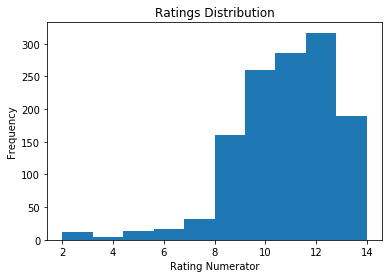

In [64]:
# graphically analyzing 
#plot the count of rating numerators between 2 and 14
plt.hist(twitter_combined['rating_numerator'], range = (2, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution');

- The histogram is left skewed with peaks at 12. 

In [65]:
twitter_combined['breed'].value_counts()

               1123
pupper          114
doggo            35
puppo            15
floofer           5
doggopupper       3
Name: breed, dtype: int64

- Pupper is the most common stage of the dog. We can also see that many of the data for dog stages are not present. 

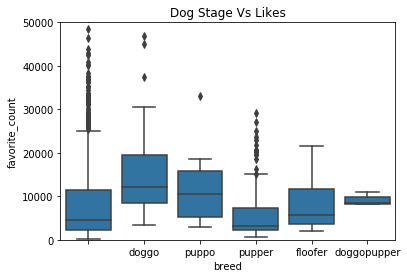

In [66]:
# using a violin plot to visualize dog stages vs likes counts
base_color = sns.color_palette()[0]
sns.boxplot(data = twitter_combined, x = 'breed', y = 'favorite_count', color = base_color);
plt.ylim(0, 50000)
plt.title('Dog Stage Vs Likes');

- As we can see from t he graph most of the likes are between 0 and 20000. 
- Also doggo has more # of likes than other stages of dog

Let's try to find out if the dog ratings has any effect on the likes

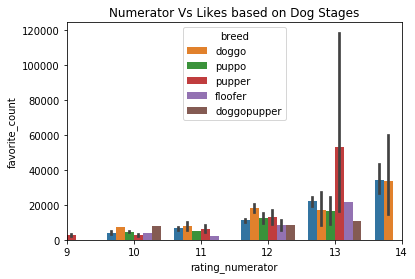

In [67]:
# Checking if the rating numerator affects the no. of likes catogorized by the dog stages
sns.barplot(x='rating_numerator' , y = 'favorite_count', hue='breed', data=twitter_combined);
plt.xlim (7,12)
plt.title('Numerator Vs Likes based on Dog Stages');

- From the graph at numerator 12 doggo has most likes followed by pupper, puppo and floofer. 

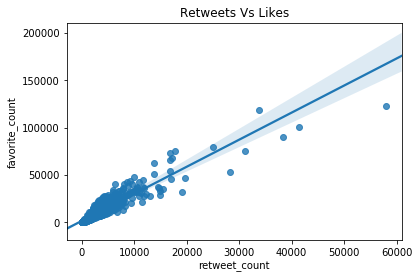

In [68]:
#Corelation between the counts of likes and the counts of retweets
sns.regplot(data = twitter_combined, x = 'retweet_count', y = 'favorite_count');
plt.title('Retweets Vs Likes');

- From the scatter plot we can observe a direct correlation between likes and the retweet

#### Conclusion

- Pupper is the most common stage of the dog.
- From the graph at numerator 12 doggo has most likes followed by pupper, puppo and floofer
- We can observe a direct correlation between likes and the retweets.
- Doggo has more # of likes than other stages of dog